In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA




In [6]:
# Load dataset
df = pd.read_csv(r'..\data\operational_risk_data.csv', parse_dates=['Date'])
df['Loss_Lag1'] = df['Operational_Losses'].shift(1)
df = df.fillna(0)

In [7]:
df

,Date,Operational_Losses,Department,Event_Type,External_Factor,Loss_Lag1
0,2024-01-01,12000,Finance,System Failure,0.5,0.0
1,2024-01-02,8000,IT,Fraud,0.6,12000.0
2,2024-01-03,5000,HR,Human Error,0.4,8000.0
3,2024-01-04,15000,Finance,System Failure,0.7,5000.0
4,2024-01-05,7000,IT,Fraud,0.5,15000.0
5,2024-01-06,9000,HR,Human Error,0.4,7000.0
6,2024-01-07,13000,Finance,System Failure,0.6,9000.0
7,2024-01-08,6000,IT,Fraud,0.5,13000.0
8,2024-01-09,4000,HR,Human Error,0.3,6000.0
9,2024-01-10,16000,Finance,System Failure,0.8,4000.0


In [8]:

# One-hot encoding
df = pd.get_dummies(df, columns=['Department','Event_Type'], drop_first=True)



In [9]:
# Train-test split
features = [col for col in df.columns if col not in ['Date','Operational_Losses']]
X = df[features]
y = df['Operational_Losses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [10]:

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)



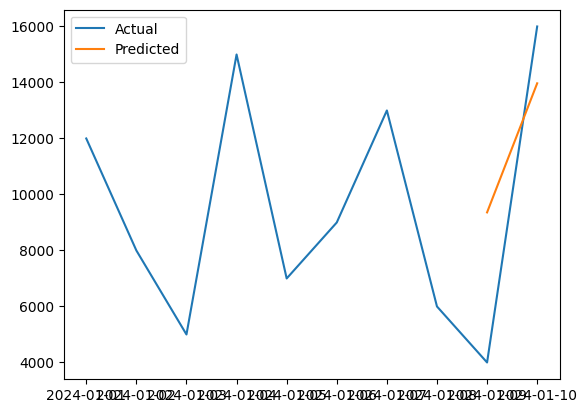

In [11]:
# Plot Actual vs Predicted
plt.plot(df['Date'], df['Operational_Losses'], label='Actual')
plt.plot(df['Date'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.legend()
plt.show()


In [12]:

# ARIMA Forecast
arima_model = ARIMA(df['Operational_Losses'], order=(2,1,0))
arima_fit = arima_model.fit()
forecast = arima_fit.forecast(steps=5)
print("Next 5-day forecast:", forecast)

Next 5-day forecast: 10     4997.824801
11     6608.725177
12    14081.269981
13     4848.547667
14     8366.124756
Name: predicted_mean, dtype: float64


C:\Users\simra\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
